### 우선 테스트 데이터셋에서 데이터 하나하나마다 Retrieval Precision 구해야함 -> 개별 데이터에 대한 Retrieval precision 구하는 함수 필요

In [98]:
import json
def evaluate_retrieval_prec_for_questions(data_path):
    with open(data_path,'r') as f:
        precisions = []
        #우선 한 줄마다의 사전을 받고
        for idx, line in enumerate(f):
            test_dict = json.loads(line.strip())

            #만약 docs가 비어있다면 패스
            if len(test_dict.get("docs")) == 0:
                precisions.append(0) 
                continue
            
            #한 줄 사전에서 docs_list 부분을 따로 뽑아내고, ground_truth도 뽑아내서 ,
            count = 0
            docs_list = [page_content_dict["page_content"] for page_content_dict in test_dict.get("docs")]
            ground_truth = test_dict.get("ground_truth")

            #ground_truth에 있는 정답이 docs_list에 포함되어 있는 개수를 세면 됨.
            for idx,doc in enumerate(docs_list):
                if any(str(gold_answer).lower() in doc.lower() for gold_answer in ground_truth):
                    count += 1
            
            precisions.append(count / len(docs_list))
            # print(len(docs_list))
    
    return precisions
            

In [99]:
prec_list = evaluate_retrieval_prec_for_questions("output/output_with_base_api_rag_2.jsonl")

### 이 후에 Precision에 따라 나누기

### baseline rag

In [117]:
def split_precision_group(output_path,prec_list):

    with open(output_path, "r") as f:

        f = f.readlines()

        precision_test_dict = {'<= 0.1' : [],'<= 0.2' : [] , '<= 0.3' : [] ,'<= 0.5' : [], '<= 0.6' : [] ,'<= 0.7' : [] ,'<= 0.8' : [] , '<= 0.9' : [],'<= 1.0' : [] }

        for idx,prec in enumerate(prec_list):
            if prec <= 0.1:
                precision_test_dict['<= 0.1'].append(json.loads(f[idx]))
            elif prec <= 0.2:
                precision_test_dict['<= 0.2'].append(json.loads(f[idx]))
            elif prec <= 0.3:
                precision_test_dict['<= 0.3'].append(json.loads(f[idx]))
            elif prec <= 0.5:
                precision_test_dict['<= 0.5'].append(json.loads(f[idx]))
            elif prec <= 0.6:
                precision_test_dict['<= 0.6'].append(json.loads(f[idx]))
            elif prec <=0.7:
                precision_test_dict['<= 0.7'].append(json.loads(f[idx]))
            elif prec <= 0.8:
                precision_test_dict['<= 0.8'].append(json.loads(f[idx]))
            elif prec <= 0.9:
                precision_test_dict['<= 0.9'].append(json.loads(f[idx]))
            else:
                precision_test_dict['<= 1.0'].append(json.loads(f[idx]))

    return precision_test_dict

In [118]:
from acc_prec import calculate_accuracy
precision_test_dict_1 = split_precision_group("output/output_with_base_api_rag_2.jsonl",prec_list)
precision_result_dict_1 = {}

for key in precision_test_dict_1:
    precision_result_dict_1[key] = calculate_accuracy(precision_test_dict_1[key])

In [119]:
precision_result_dict_1

{'<= 0.1': 12.46819338422392,
 '<= 0.2': 69.64285714285714,
 '<= 0.3': 75.86206896551724,
 '<= 0.5': 78.33333333333333,
 '<= 0.6': 96.42857142857143,
 '<= 0.7': 90.9090909090909,
 '<= 0.8': 94.82758620689656,
 '<= 0.9': 99.02912621359224,
 '<= 1.0': 98.48484848484848}

### no rag

In [120]:
prec_list = evaluate_retrieval_prec_for_questions("output/output_with_base_api_rag_2.jsonl")
from acc_prec import calculate_accuracy
precision_test_dict_2 = split_precision_group("output/output_with_no_rag_2.jsonl",prec_list)
precision_result_dict_2 = {}

for key in precision_test_dict_2:
    precision_result_dict_2[key] = calculate_accuracy(precision_test_dict_2[key])

In [121]:
precision_result_dict_2

{'<= 0.1': 13.231552162849871,
 '<= 0.2': 25.0,
 '<= 0.3': 41.37931034482759,
 '<= 0.5': 50.83333333333333,
 '<= 0.6': 64.28571428571429,
 '<= 0.7': 68.18181818181817,
 '<= 0.8': 72.41379310344827,
 '<= 0.9': 70.87378640776699,
 '<= 1.0': 81.06060606060606}

### Astute RAG

In [122]:
prec_list = evaluate_retrieval_prec_for_questions("output/output_with_astute_rag_2.jsonl")
from acc_prec import calculate_accuracy
precision_test_dict_3 = split_precision_group("output/output_with_astute_rag_2.jsonl",prec_list)
precision_result_dict_3 = {}

for key in precision_test_dict_3:
    precision_result_dict_3[key] = calculate_accuracy(precision_test_dict_3[key])

In [123]:
precision_result_dict_3

{'<= 0.1': 25.190839694656486,
 '<= 0.2': 78.57142857142857,
 '<= 0.3': 84.48275862068965,
 '<= 0.5': 93.33333333333333,
 '<= 0.6': 98.21428571428571,
 '<= 0.7': 98.48484848484848,
 '<= 0.8': 96.55172413793103,
 '<= 0.9': 98.05825242718447,
 '<= 1.0': 100.0}

### 뭔가 너무 딱딱한데, 걍 테스트 데이터셋에 대해서 retrieval_precision을 sort하고 , 그냥 거기서 하나하나에 대해서 하는게 맞을듯

In [97]:
# from collections import defaultdict

# def calculate_accuracy_by_precision(output_path, precision_step=0.1):
#     """
#     각 데이터의 retrieval precision을 구하고, 
#     precision 구간별 (0.0, 0.1, 0.2, ..., 1.0) accuracy를 계산
#     """
#     # 1. 각 데이터의 precision 계산
#     precisions = evaluate_retrieval_prec_for_questions(output_path)
    
#     # 2. 파일 다시 읽어서 accuracy 계산을 위한 데이터 준비
#     with open(output_path, 'r') as f:
#         lines = f.readlines()
    
#     # 3. precision 구간별로 그룹화 (0.0, 0.1, 0.2, ..., 1.0)
#     precision_groups = defaultdict(list)
    
#     for idx, prec in enumerate(precisions):
#         # precision을 0.1 단위로 반올림 (예: 0.15 -> 0.2, 0.34 -> 0.3)
#         # 구간: [0, 0.1), [0.1, 0.2), ..., [0.9, 1.0]
#         if prec == 0:
#             group_key = 0.0
#         else:
#             group_key = round((prec // precision_step + 1) * precision_step, 1)
#             group_key = min(group_key, 1.0)  # 최대 1.0
        
#         precision_groups[group_key].append(json.loads(lines[idx]))
    
#     # 4. 각 그룹별 accuracy 계산
#     result = {}
#     for prec_key in sorted(precision_groups.keys()):
#         if len(precision_groups[prec_key]) > 0:
#             acc = calculate_accuracy(precision_groups[prec_key])
#             result[prec_key] = acc
#             print(f"Precision ≤{prec_key:.1f}: Accuracy = {acc:.2f}% (n={len(precision_groups[prec_key])})")
    
#     return result

# # 각 방법별로 계산
# print("=== Baseline RAG ===")
# rag_result = calculate_accuracy_by_precision("output/output_with_base_api_rag_2.jsonl")

# print("\n=== No RAG ===")
# # No RAG는 RAG의 precision 기준으로 그룹화해야 함
# precisions = evaluate_retrieval_prec_for_questions("output/output_with_base_api_rag_2.jsonl")
# with open("output/output_with_no_rag_2.jsonl", 'r') as f:
#     lines = f.readlines()

# precision_groups = defaultdict(list)
# for idx, prec in enumerate(precisions):
#     if prec == 0:
#         group_key = 0.0
#     else:
#         group_key = round((prec // 0.1 + 1) * 0.1, 1)
#         group_key = min(group_key, 1.0)
#     precision_groups[group_key].append(json.loads(lines[idx]))

# no_rag_result = {}
# for prec_key in sorted(precision_groups.keys()):
#     if len(precision_groups[prec_key]) > 0:
#         acc = calculate_accuracy(precision_groups[prec_key])
#         no_rag_result[prec_key] = acc
#         print(f"Precision ≤{prec_key:.1f}: Accuracy = {acc:.2f}% (n={len(precision_groups[prec_key])})")

# print("\n=== Astute RAG ===")
# astute_result = calculate_accuracy_by_precision("output/output_with_astute_rag_2.jsonl")

### 시각화

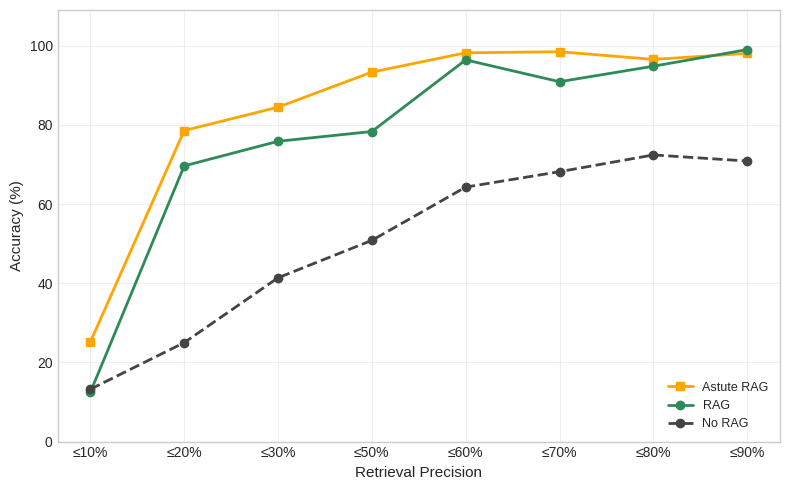

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 스타일 설정
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)

# x축 라벨 (0.4 제외, 0.1 ~ 0.9)
x_labels = ['≤10%', '≤20%', '≤30%', '≤50%', '≤60%', '≤70%', '≤80%', '≤90%']
x = np.arange(len(x_labels))

# 각 방법별 accuracy 값 추출 (0.4 제외)
keys = ['<= 0.1', '<= 0.2', '<= 0.3', '<= 0.5', '<= 0.6', '<= 0.7', '<= 0.8', '<= 0.9']

baseline_rag_acc = [precision_result_dict_1.get(key, 0) for key in keys]
no_rag_acc = [precision_result_dict_2.get(key, 0) for key in keys]
astute_rag_acc = [precision_result_dict_3.get(key, 0) for key in keys]

# 직선 라인 그래프 그리기
ax.plot(x, astute_rag_acc, marker='s', markersize=6, linewidth=2, label='Astute RAG', color='#FFA500')
ax.plot(x, baseline_rag_acc, marker='o', markersize=6, linewidth=2, label='RAG', color='#2E8B57')
ax.plot(x, no_rag_acc, marker='o', markersize=6, linewidth=2, linestyle='--', label='No RAG', color='#444444')

# 그래프 꾸미기
ax.set_xlabel('Retrieval Precision', fontsize=11)
ax.set_ylabel('Accuracy (%)', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend(loc='lower right', fontsize=9, framealpha=0.9)

# y축 범위를 데이터에 맞게 자동 조정
all_acc = baseline_rag_acc + no_rag_acc + astute_rag_acc
y_max = max(all_acc) + 10
ax.set_ylim(0, y_max)

ax.grid(True, linestyle='-', alpha=0.3)

# 배경색 설정
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.savefig('accuracy_by_precision.png', bbox_inches='tight', dpi=150)
plt.show()